In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\shadowleaf\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
matrix1 = np.array([(2, 2, 2),(2, 2, 2),(2, 2, 2)], dtype='int32')
matrix2 = np.array([(1, 1, 1),(1, 1, 1),(1, 1, 1)], dtype='int32')

In [10]:
print('matrix1 = \n', matrix1)
print('matrix2 = \n', matrix2)

matrix1 = 
 [[2 2 2]
 [2 2 2]
 [2 2 2]]
matrix2 = 
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


In [11]:
matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)

In [12]:
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

In [13]:
matrix_3 = np.array([(2,7,2),(1,4,2),(9,0,2)],dtype='float32')
matrix_det = tf.matrix_determinant(matrix_3)

In [15]:
with tf.Session() as sess:
    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)

In [17]:
print('product : \n',result1, '\nsum : \n', result2, '\ndet : \n', result3)

product : 
 [[6 6 6]
 [6 6 6]
 [6 6 6]] 
sum : 
 [[3 3 3]
 [3 3 3]
 [3 3 3]] 
det : 
 55.999992


In [24]:
x = 1.+4j
x.real, x.imag

(1.0, 4.0)

# Mandelbrot Set

Formal definition
$ Z_{n+1} = Z_{n}^{2} + c, Z(0) = 0 $

In [64]:
Y, X = np.mgrid[-1.3:1.3:0.002, -2:1:0.002]
Z = X + 1j*Y
c = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(c)
ns = tf.Variable(tf.zeros_like(c, tf.float32))
print(ns)

<tf.Variable 'Variable_11:0' shape=(1300, 1500) dtype=float32_ref>


In [65]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()
zs_ = zs * zs + c
not_diverged = tf.abs(zs_) < 4
step = tf.group(zs.assign(zs_), \
               ns.assign_add(tf.cast(not_diverged, tf.float32)))
for i in range(200):
    step.run()

C:\Users\shadowleaf\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [67]:
msetfig = ns.eval()

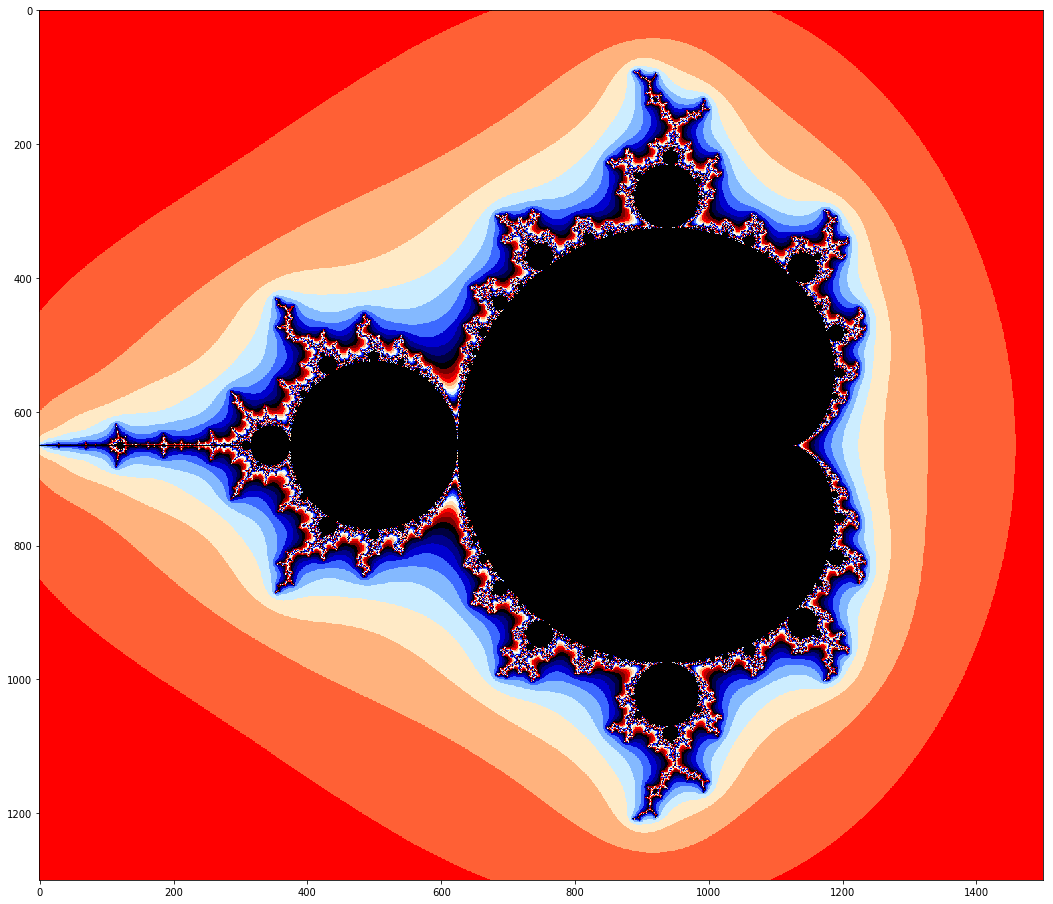

In [69]:
fig=plt.figure(figsize=(18, 16))
plt.imshow(msetfig, cmap='flag')
plt.show()

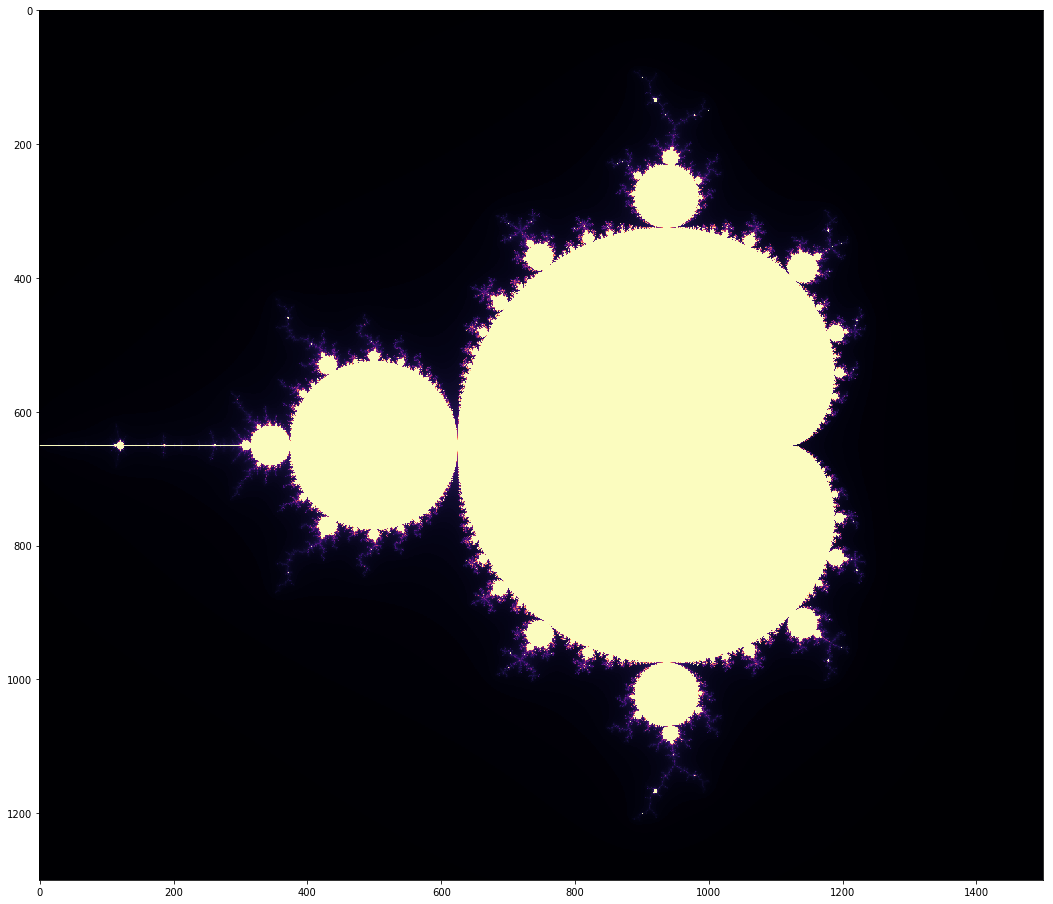

In [85]:
plt.figure(figsize=(18, 16))
plt.imshow(msetfig, cmap='magma')
plt.show()

# Julia Set

In [4]:
Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]
Z = X + 1j*Y
Z = tf.constant(Z.astype("complex64"))
zs = tf.Variable(Z)
ns = tf.Variable(tf.zeros_like(Z, "float32"))

In [5]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()
c = complex(0.0, 0.75)
zs_ = zs * zs - c
not_diverged = tf.abs(zs_) < 4
step = tf.group(zs.assign(zs_),\
               ns.assign_add(tf.cast(not_diverged, "float32")))
for i in range(200): step.run()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [7]:
juliafig = ns.eval()

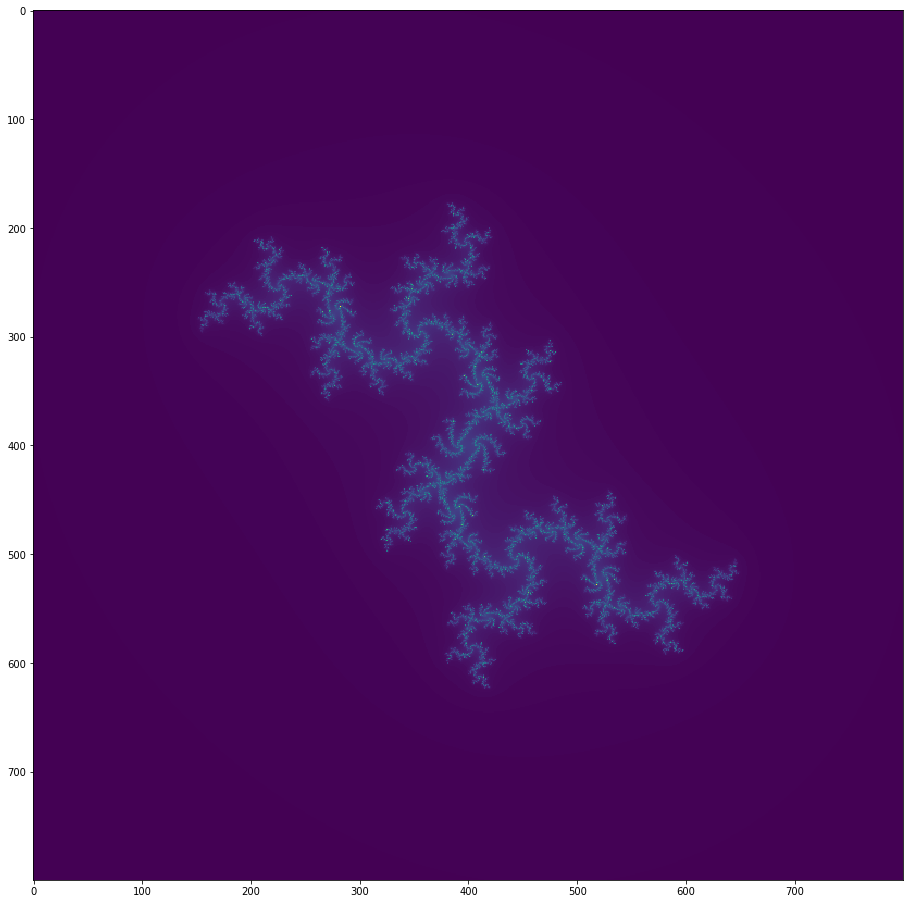

In [9]:
plt.figure(figsize=(18, 16))
plt.imshow(juliafig)
plt.show()

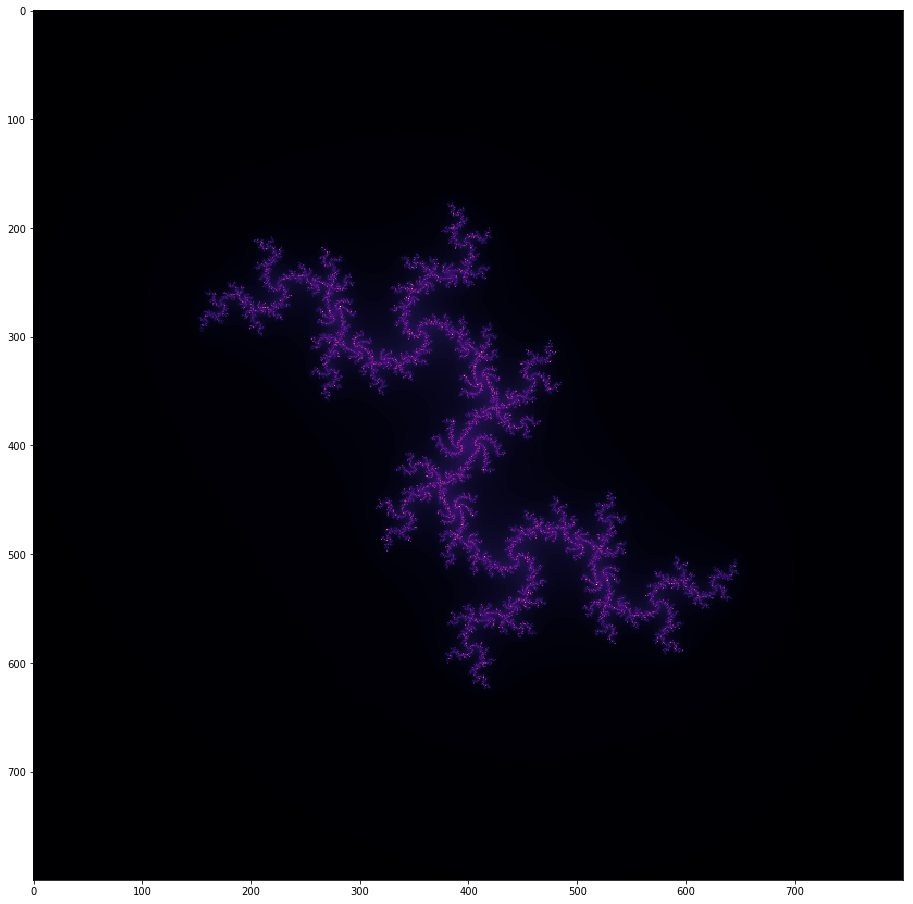

In [10]:
plt.figure(figsize=(18, 16))
plt.imshow(juliafig, cmap='magma')
plt.show()

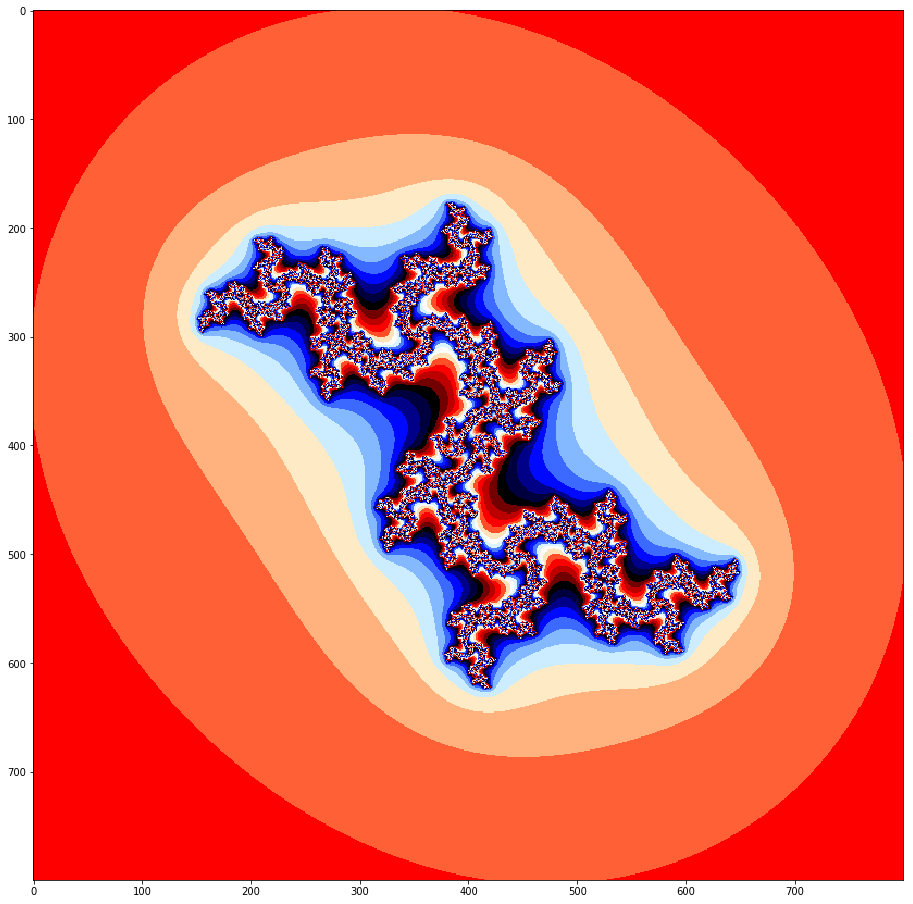

In [11]:
plt.figure(figsize=(18, 16))
plt.imshow(juliafig, cmap='flag')
plt.show()

# Gradients

In [12]:
x = tf.placeholder(tf.float32)
y = 2*x*x
var_grad = tf.gradients(y, x)

In [13]:
with tf.Session() as sess:
    var_grad_val = sess.run(var_grad, feed_dict={x:1})

In [14]:
print(var_grad_val)

[4.0]


# Solving PDE

In [28]:
N = 500
u_init = np.zeros([N, N], dtype=np.float32)
for n in range(40):
    a, b = np.random.randint(0, N, 2)
    u_init[a, b] = np.random.uniform()

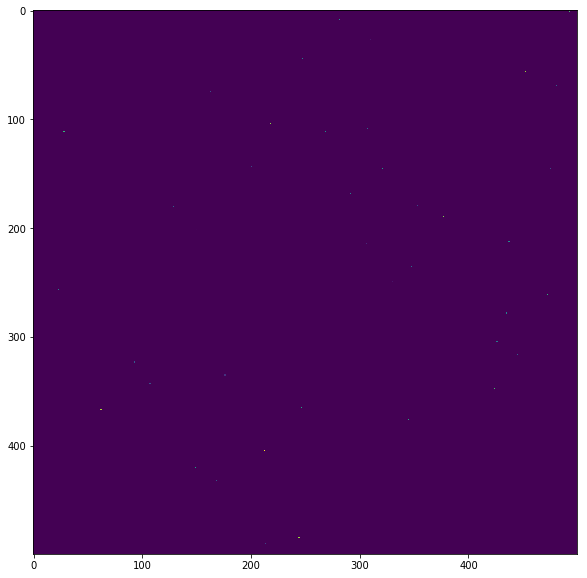

In [29]:
plt.figure(figsize=(10, 10))
plt.imshow(u_init)
plt.show()

In [38]:
def make_kernel(a):
    a = np.asarray(a)
    a = a.reshape(list(a.shape) + [1,1])
    return tf.constant(a, dtype=1)

def simple_conv(x, k):
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1],padding='SAME')
    return y[0, :, :, 0]

def laplace(x):
    laplace_k = make_kernel([[0.5, 1.0, 0.5],
                             [1.0, -6., 1.0],
                             [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)

In [39]:
ut_init = np.zeros([N, N], dtype=np.float32)

eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

step = tf.group(U.assign(U_), Ut.assign(Ut_))

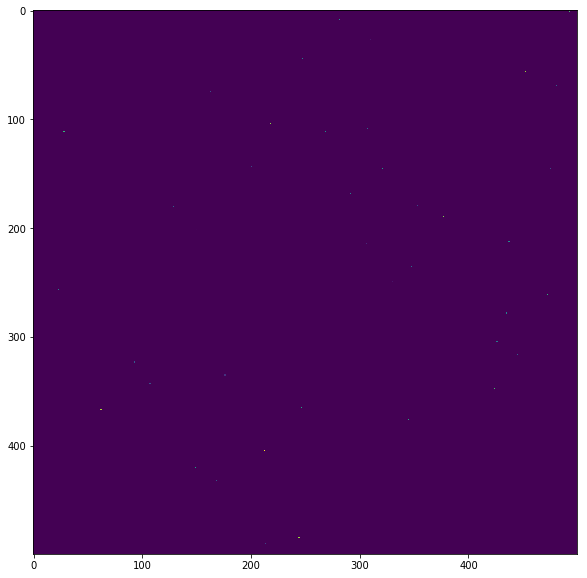

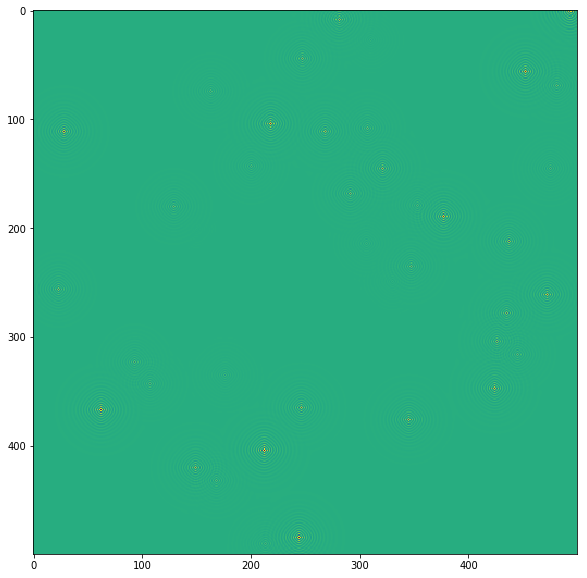

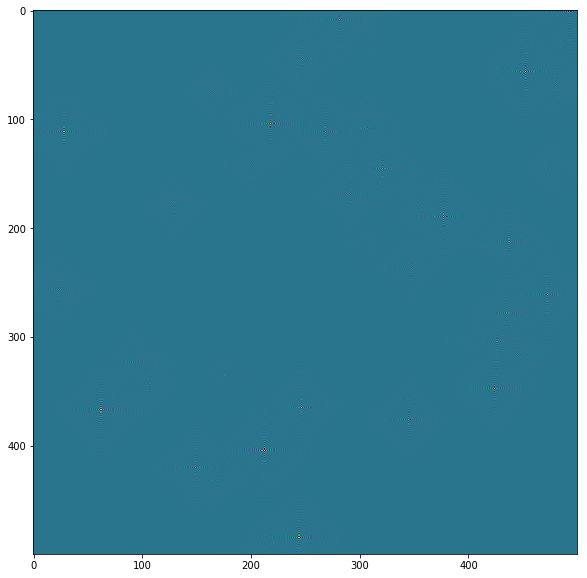

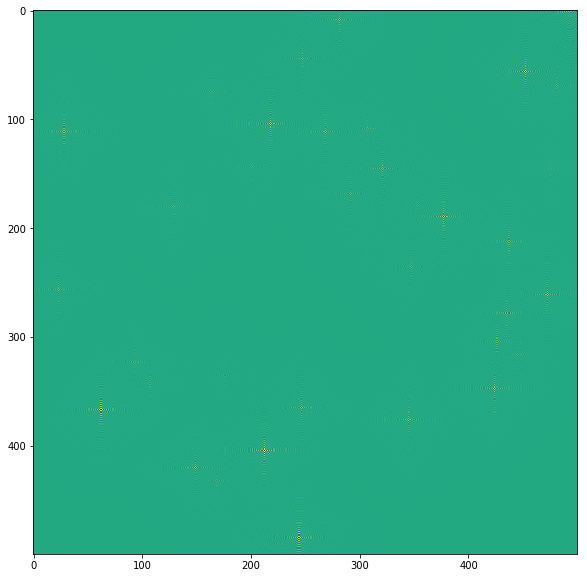

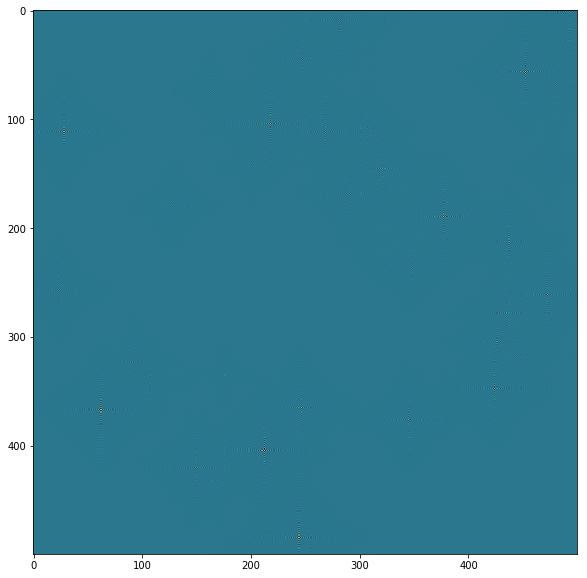

In [40]:
tf.initialize_all_variables().run()

for i in range(5000):
    step.run({eps: 0.03, damping: 0.04})
    if i % 1000 == 0:
        plt.figure(figsize=(10, 10))
        plt.imshow(U.eval())
        plt.show()